## Billionaires Analysis with Python

#### *The **[dataset](https://www.kaggle.com/datasets/jjdaguirre/forbes-billionaires-2022)** that I am using to analyze the data about billionaires around the world was curated by Forbes and is downloaded from Kaggle. The dataset contains information about global billionaires in 2022, including their:*

+ **Rank**
+ **Name**
+ **Net Worth**
+ **Age**
+ **Country**
+ **Source**
+ **Industry**

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style="darkgrid")

warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('2022_forbes_billionaires.csv')
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [92]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [93]:
df.dtypes

rank         int64
name        object
networth    object
age          int64
country     object
source      object
industry    object
dtype: object

In [94]:
df.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 142.3+ KB


In [96]:
df.isna().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [97]:
df.head(10)

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,$111 B,49,United States,Google,Technology
6,7,Sergey Brin,$107 B,48,United States,Google,Technology
7,8,Larry Ellison,$106 B,77,United States,software,Technology
8,9,Steve Ballmer,$91.4 B,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,$90.7 B,64,India,diversified,Diversified


In [98]:
df.columns

Index(['rank', 'name', 'networth', 'age', 'country', 'source', 'industry'], dtype='object')

In [99]:
df["networth"] = df["networth"].str.replace('[\$\ B]', '')

In [100]:
df["networth"]= df["networth"].astype(float)

In [101]:
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [102]:
df.rename(columns={"rank": "Rank", 
                   "name": "Name", 
                   "networth": "Networth", 
                   "age": "Age", 
                   "country": "Country", 
                   "source": "Source", 
                   "industry": "Industry"}, inplace=True)

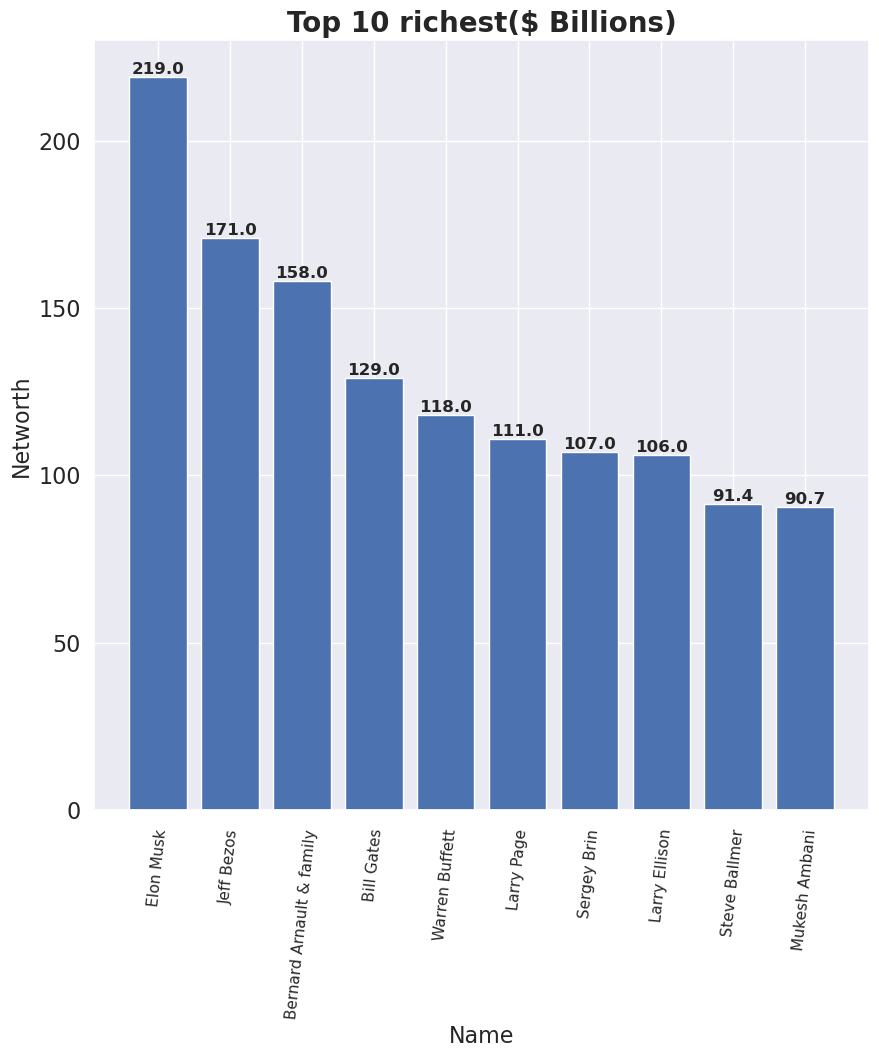

In [103]:
fig, ax = plt.subplots(figsize=(10, 10))


top_10_billionaires  = df.iloc[:10]
ax.bar(top_10_billionaires["Name"],
       top_10_billionaires["Networth"])
ax.set_title("Top 10 richest($ Billions)", fontsize=20, fontweight='bold')
ax.set_xlabel("Name", fontsize=16)
ax.set_ylabel("Networth" , fontsize=16)
ax.tick_params(axis='x', labelrotation=84)
for i, val in enumerate(top_10_billionaires['Networth'].values):
    ax.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':900, 'size':12})
ax.tick_params(axis="y", labelsize=16)
#plt.xticks(rotation=90);
fig.savefig("top_10.png")

In [16]:
Top_10_Countries = df["Country"].value_counts()[:10]

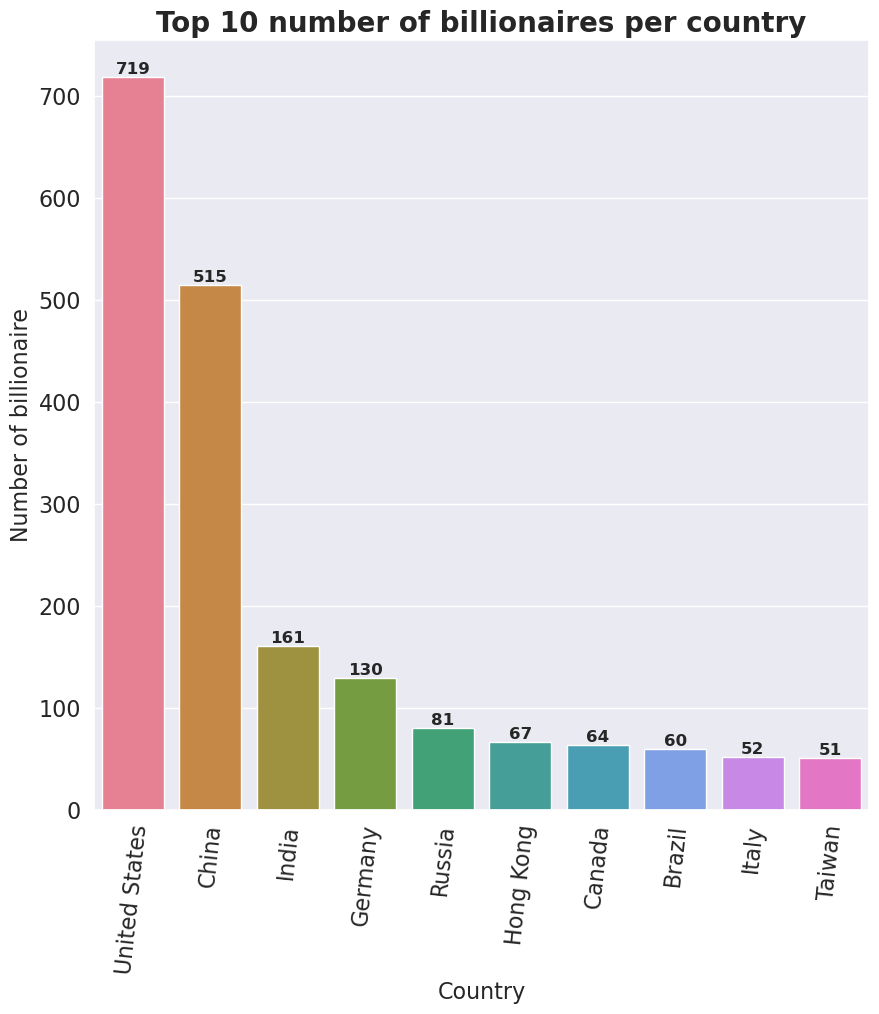

In [104]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))
# plot a bar chart
df1 = pd.DataFrame({"Country":Top_10_Countries.index,
                    "Number":Top_10_Countries.values})
ax = sns.barplot( 
    x="Country",
    y="Number",
    data=df1, 
    estimator=sum, 
    ci=None, 
    palette="husl");
ax.tick_params(axis="y", labelsize=16)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis='x', labelrotation=84)
ax.set_title("Top 10 number of billionaires per country", fontsize=20, fontweight='bold')
ax.set_xlabel("Country", fontsize=16)
for i, val in enumerate(df1['Number'].values):
    ax.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':900, 'size':12})
ax.set_ylabel("Number of billionaire" , fontsize=16);
fig.savefig("top_10_per_country.png")

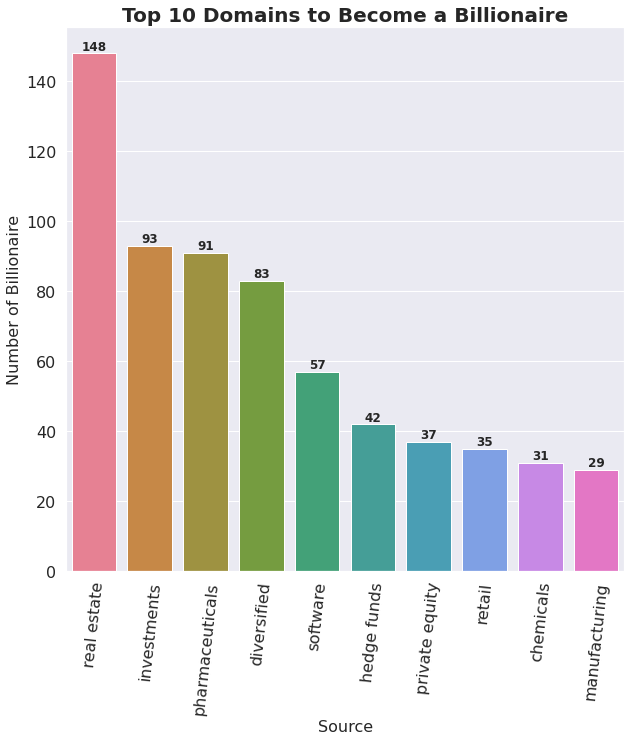

In [24]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))
# plot a bar chart
source_top = df["Source"].value_counts()[:10]
source_top_data = pd.DataFrame({"Source":source_top.index,
                                "Num": source_top.values})
ax = sns.barplot( 
    x="Source",
    y="Num",
    data=source_top_data, 
    estimator=sum, 
    ci=None, 
    palette="husl");
ax.tick_params(axis="y", labelsize=16)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis='x', labelrotation=84)
ax.set_title("Top 10 Domains to Become a Billionaire", fontsize=20, fontweight='bold')
ax.set_xlabel("Source", fontsize=16)
for i, val in enumerate(source_top_data['Num'].values):
    ax.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':900, 'size':12})
ax.set_ylabel("Number of Billionaire" , fontsize=16);

In [106]:
plt.style.use('default')

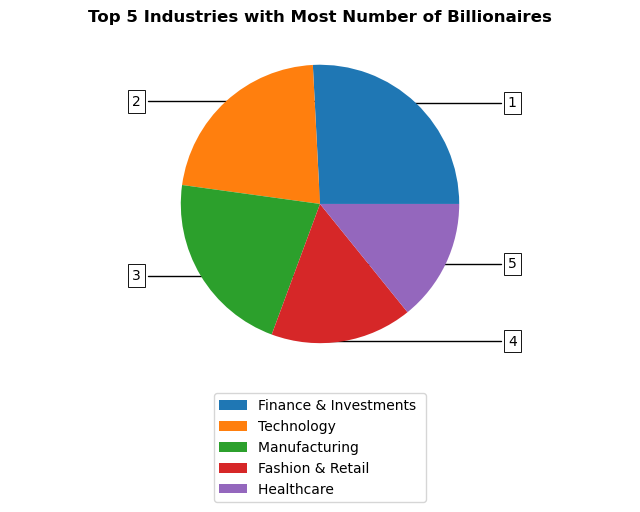

In [107]:
# Subplot

fig, ax= plt.subplots(figsize=(8,6))
plt.subplots_adjust(bottom=0.3)

# Coordinates and labels
top_ind = df["Industry"].value_counts()[:5]
data  = list(top_ind.values)
recipe = list(top_ind.index)
# Title


plt.title('Top 5 Industries with Most Number of Billionaires', fontweight='bold')
plt.gca().axis("equal")

# Plot pie

patches, texts = pie = plt.pie(data)

# Annotate

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords='data',arrowprops=arrowprops, 
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(patches):
    ang = (p.theta2 - p.theta1)/2.+p.theta1
    y = np.sin(ang/180.*np.pi)
    x = 1.35*np.sign(np.cos(ang/180.*np.pi))
    plt.gca().annotate(str(1+i), xy=(0, 0), xytext=( x, y), **kw )

# Legend
plt.legend(pie[0],recipe, loc="center", bbox_to_anchor=(0.5,-0.2))

# Display
plt.show()
fig.savefig("top_5_in.png")

In [108]:
# generate continent code  based on country name 
import pycountry_convert as pc

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            country_code=pc.country_name_to_country_alpha2(country)
            code = pc.country_alpha2_to_continent_code(country_code)
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 

df['Continent']=alpha3code(df.Country)
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry,Continent
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,NA
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,NA
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,EU
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,NA
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,NA


In [109]:
df['Continent'].mask(df['Continent'] == 'None', "AF", inplace=True)

## African Billionaires Analysis 
***The data that will be visualized from here, are only related to African billionaires.***

In [110]:
african_billionaires = df[df["Continent"]=="AF"]
african_billionaires

,Rank,Name,Networth,Age,Country,Source,Industry,Continent
129,130,Aliko Dangote,14.0,64,Nigeria,"cement, sugar",Manufacturing,AF
233,230,Johann Rupert & family,8.9,71,South Africa,luxury goods,Fashion & Retail,AF
244,241,Nicky Oppenheimer & family,8.7,76,South Africa,diamonds,Metals & Mining,AF
310,304,Nassef Sawiris,7.7,61,Egypt,"construction, investments",Construction & Engineering,AF
323,324,Mike Adenuga,7.3,68,Nigeria,"telecom, oil",Diversified,AF
359,350,Abdulsamad Rabiu,6.9,61,Nigeria,"cement, sugar",Diversified,AF
513,509,Nathan Kirsh,5.3,90,Eswatini (Swaziland),"retail, real estate",Fashion & Retail,AF
546,536,Issad Rebrab & family,5.1,78,Algeria,food,Food & Beverage,AF
906,883,Naguib Sawiris,3.4,67,Egypt,telecom,Telecom,AF
934,913,Patrice Motsepe,3.3,60,South Africa,mining,Metals & Mining,AF


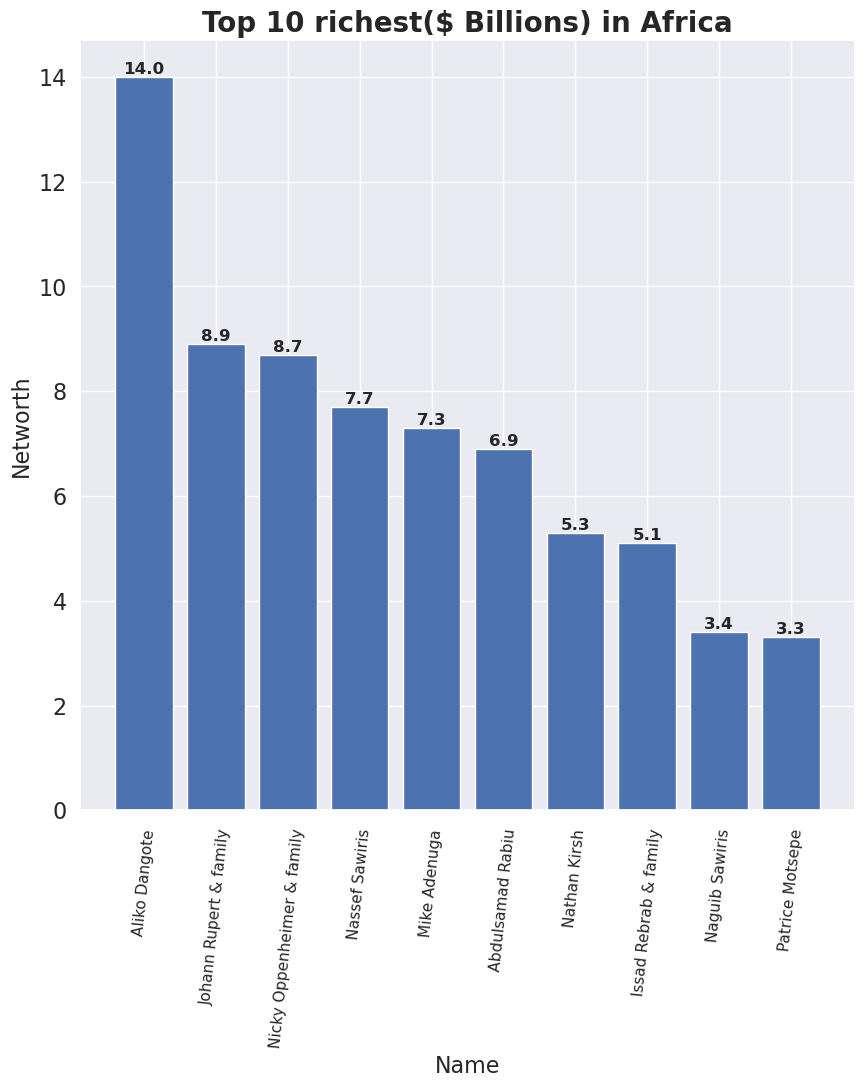

In [111]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 10))

top_10_billionaires  = african_billionaires.iloc[:10]
ax.bar(top_10_billionaires["Name"],
       top_10_billionaires["Networth"])
ax.set_title("Top 10 richest($ Billions) in Africa", fontsize=20, fontweight='bold')
ax.set_xlabel("Name", fontsize=16)
ax.set_ylabel("Networth" , fontsize=16)
ax.tick_params(axis='x', labelrotation=84)
for i, val in enumerate(top_10_billionaires['Networth'].values):
    ax.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':900, 'size':12})
ax.tick_params(axis="y", labelsize=16)
#plt.xticks(rotation=90);
fig.savefig("top_10_africab.png")

In [66]:
african_billionaires.iloc[:10]

,Rank,Name,Networth,Age,Country,Source,Industry,Continent
129,130,Aliko Dangote,14.0,64,Nigeria,"cement, sugar",Manufacturing,AF
233,230,Johann Rupert & family,8.9,71,South Africa,luxury goods,Fashion & Retail,AF
244,241,Nicky Oppenheimer & family,8.7,76,South Africa,diamonds,Metals & Mining,AF
310,304,Nassef Sawiris,7.7,61,Egypt,"construction, investments",Construction & Engineering,AF
323,324,Mike Adenuga,7.3,68,Nigeria,"telecom, oil",Diversified,AF
359,350,Abdulsamad Rabiu,6.9,61,Nigeria,"cement, sugar",Diversified,AF
513,509,Nathan Kirsh,5.3,90,Eswatini (Swaziland),"retail, real estate",Fashion & Retail,AF
546,536,Issad Rebrab & family,5.1,78,Algeria,food,Food & Beverage,AF
906,883,Naguib Sawiris,3.4,67,Egypt,telecom,Telecom,AF
934,913,Patrice Motsepe,3.3,60,South Africa,mining,Metals & Mining,AF


In [70]:
Top_10_Countriesa = african_billionaires["Country"].value_counts()[:10]
Top_10_Countriesa

Egypt                   6
South Africa            5
Nigeria                 3
Morocco                 2
Eswatini (Swaziland)    1
Algeria                 1
Zimbabwe                1
Tanzania                1
Name: Country, dtype: int64

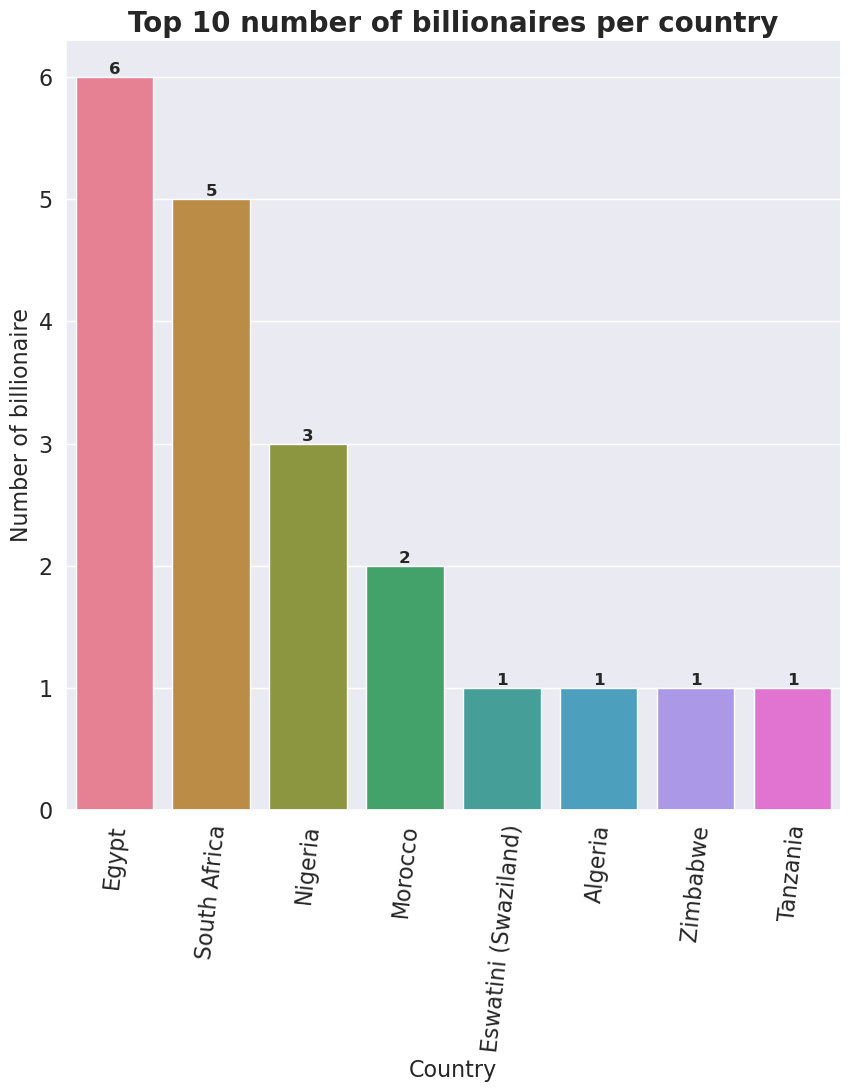

In [78]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))
# plot a bar chart
df2 = pd.DataFrame({"Country":Top_10_Countriesa.index,
                    "Number":Top_10_Countriesa.values})
ax = sns.barplot( 
    x="Country",
    y="Number",
    data=df2, 
    estimator=sum, 
    ci=None, 
    palette="husl");
ax.tick_params(axis="y", labelsize=16)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis='x', labelrotation=84)
ax.set_title("Top 10 number of billionaires per country(Africa)", fontsize=20, fontweight='bold')
ax.set_xlabel("Country", fontsize=16)
for i, val in enumerate(df2['Number'].values):
    ax.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':900, 'size':12})
ax.set_ylabel("Number of billionaire" , fontsize=16);

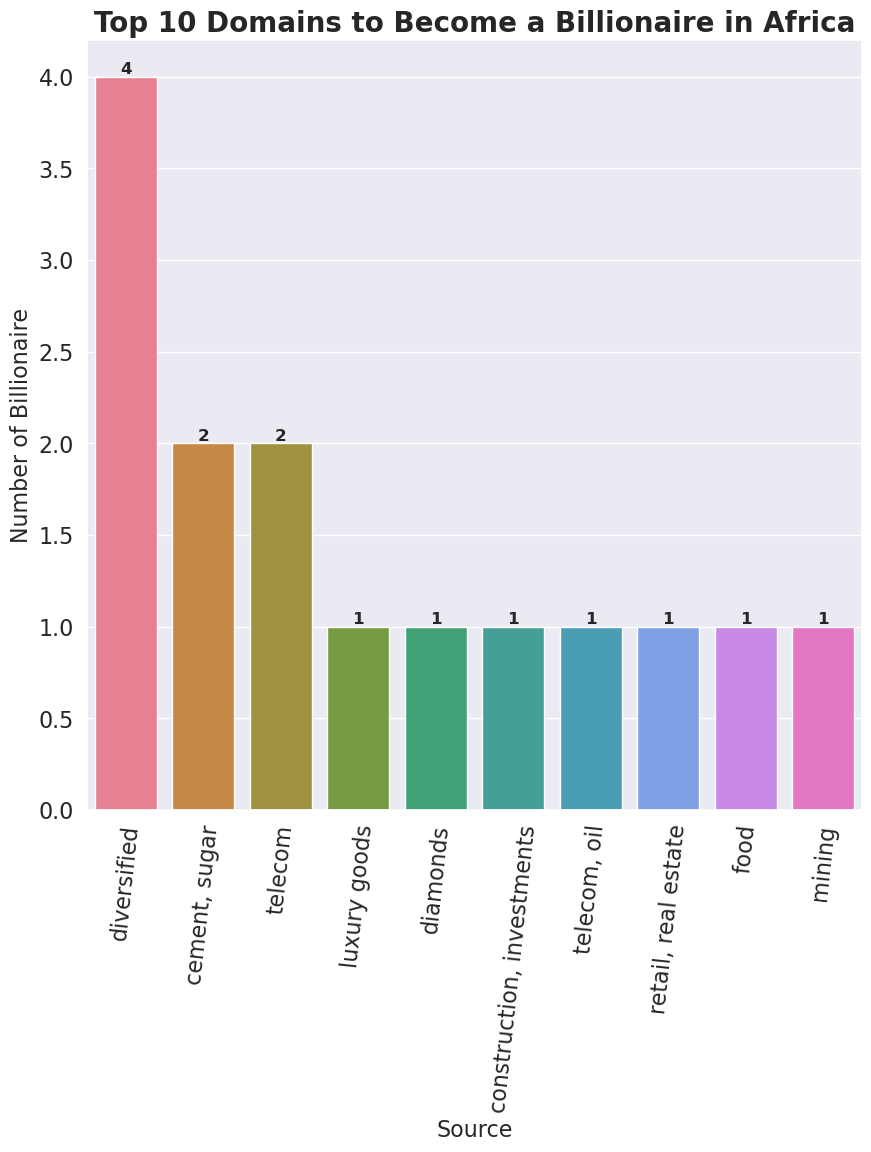

In [113]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))
# plot a bar chart
source_top = african_billionaires["Source"].value_counts()[:10]
source_top_data = pd.DataFrame({"Source":source_top.index,
                                "Num": source_top.values})
ax = sns.barplot( 
    x="Source",
    y="Num",
    data=source_top_data, 
    estimator=sum, 
    ci=None, 
    palette="husl");
ax.tick_params(axis="y", labelsize=16)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis='x', labelrotation=84)
ax.set_title("Top 10 Domains to Become a Billionaire in Africa", fontsize=20, fontweight='bold')
ax.set_xlabel("Source", fontsize=16)
for i, val in enumerate(source_top_data['Num'].values):
    ax.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':900, 'size':12})
ax.set_ylabel("Number of Billionaire" , fontsize=16);
fig.savefig("top_10_do_af.png")

In [81]:
plt.style.use('default')

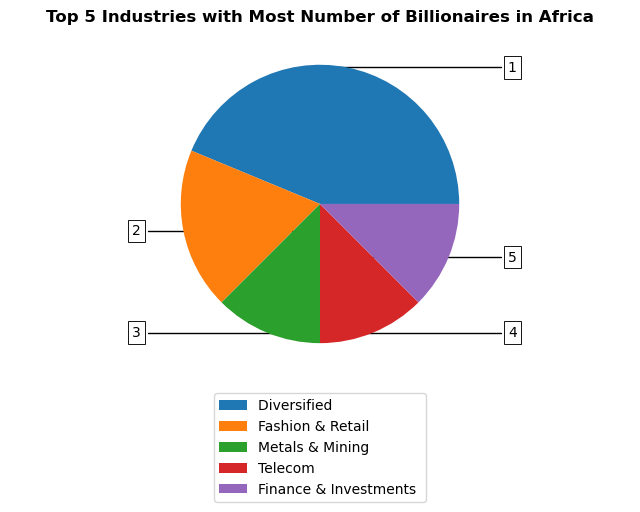

In [82]:
# Subplot

fig, ax= plt.subplots(figsize=(8,6))
plt.subplots_adjust(bottom=0.3)

# Coordinates and labels
top_ind = african_billionaires["Industry"].value_counts()[:5]
data  = list(top_ind.values)
recipe = list(top_ind.index)
# Title


plt.title('Top 5 Industries with Most Number of Billionaires in Africa', fontweight='bold')
plt.gca().axis("equal")

# Plot pie

patches, texts = pie = plt.pie(data)

# Annotate

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords='data',arrowprops=arrowprops, 
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(patches):
    ang = (p.theta2 - p.theta1)/2.+p.theta1
    y = np.sin(ang/180.*np.pi)
    x = 1.35*np.sign(np.cos(ang/180.*np.pi))
    plt.gca().annotate(str(1+i), xy=(0, 0), xytext=( x, y), **kw )

# Legend
plt.legend(pie[0],recipe, loc="center", bbox_to_anchor=(0.5,-0.2))

# Display
plt.show()

In [83]:
african_billionaires.head()

,Rank,Name,Networth,Age,Country,Source,Industry,Continent
129,130,Aliko Dangote,14.0,64,Nigeria,"cement, sugar",Manufacturing,AF
233,230,Johann Rupert & family,8.9,71,South Africa,luxury goods,Fashion & Retail,AF
244,241,Nicky Oppenheimer & family,8.7,76,South Africa,diamonds,Metals & Mining,AF
310,304,Nassef Sawiris,7.7,61,Egypt,"construction, investments",Construction & Engineering,AF
323,324,Mike Adenuga,7.3,68,Nigeria,"telecom, oil",Diversified,AF
